#                               Graduate Admission Prediction


#  Submitted By: Group 10

# Balasani Dheeraj Redddy AM.EN.U4CSE20115
# Vanguru Vekata Varun Kumar Reddy AM.EN.U4CSE20172
# Chinthakuntla Purushottam Reddy AM.EN.U4CSE20120
# S N V V S Gowtham Tadavarthy AM.EN.U4CSE20160
# Joshua Wilson Philip AM.EN.U4CSE20135
# Maddipati Umesh Chandra AM.EN.U4CSE20142


# Import modules

In [360]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Summarization

In [361]:
data = pd.read_csv("Admission_Predict.csv")
data.shape

(400, 9)

In [362]:
data.head(2)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,NaN,NaN,4,4.5,4.5,9.65,1,0.92
1,2,312.0,107.0,4,4.0,4.5,8.87,1,0.76


In [363]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          399 non-null    float64
 2   TOEFL Score        399 non-null    float64
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 28.2 KB


In [364]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,399.000000,399.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.619048,107.383459,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.391182,6.053848,1.143728,1.006869,0.898478,0.597325,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.167500,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.072500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [365]:
data.isnull().sum()

Serial No.           0
GRE Score            1
TOEFL Score          1
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [366]:
data.drop('Serial No.', axis=1, inplace=True)

In [367]:
data.rename({'Chance of Admit ': 'Chance of Admit', 'LOR ':'LOR'}, axis=1, inplace=True)

# Data Pre-processing


In [368]:
X = data.iloc[:,:-1].values 
Y = data.iloc[:,7:].values  

In [369]:
print(X[:,:])

[[   nan    nan   4.   ...   4.5    9.65   1.  ]
 [312.   107.     4.   ...   4.5    8.87   1.  ]
 [316.   104.     3.   ...   3.5    8.     1.  ]
 ...
 [330.   116.     4.   ...   4.5    9.45   1.  ]
 [312.   103.     3.   ...   4.     8.78   0.  ]
 [321.   117.     4.   ...   4.     9.66   1.  ]]


# standardization

In [370]:
from sklearn.preprocessing import StandardScaler  
st_x= StandardScaler()  
X[:,:3]= st_x.fit_transform(X[:,:3])  

In [371]:
print(X)

[[        nan         nan  0.79882862 ...  4.5         9.65
   1.        ]
 [-0.40600235 -0.06342083  0.79882862 ...  4.5         8.87
   1.        ]
 [-0.05441269 -0.5595956  -0.07660001 ...  3.5         8.
   1.        ]
 ...
 [ 1.17615115  1.42510346  0.79882862 ...  4.5         9.45
   1.        ]
 [-0.40600235 -0.72498719 -0.07660001 ...  4.          8.78
   0.        ]
 [ 0.3850744   1.59049505  0.79882862 ...  4.          9.66
   1.        ]]


# MinMax Scaler

In [372]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[:,0:3]= scaler.fit_transform(X[:,0:3])
print(X[:,0:3])

[[       nan        nan 0.75      ]
 [0.44       0.53571429 0.75      ]
 [0.52       0.42857143 0.5       ]
 ...
 [0.8        0.85714286 0.75      ]
 [0.44       0.39285714 0.5       ]
 [0.62       0.89285714 0.75      ]]


# Filling misssing values with mode

In [373]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(X[:, :3])
X[:, :3]= imputer.transform(X[:,:3]) 
print(X[0, :3])

[0.44       0.64285714 0.75      ]


# Data Visualization:

array([[<AxesSubplot:title={'center':'GRE Score'}>,
        <AxesSubplot:title={'center':'TOEFL Score'}>,
        <AxesSubplot:title={'center':'University Rating'}>],
       [<AxesSubplot:title={'center':'SOP'}>,
        <AxesSubplot:title={'center':'LOR'}>,
        <AxesSubplot:title={'center':'CGPA'}>],
       [<AxesSubplot:title={'center':'Research'}>,
        <AxesSubplot:title={'center':'Chance of Admit'}>, <AxesSubplot:>]],
      dtype=object)

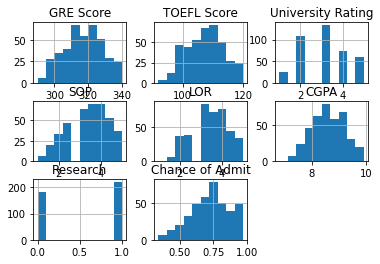

In [374]:
import matplotlib.pyplot as plt
data.hist()


In [375]:
GRE = pd.DataFrame(data['GRE Score'])
GRE.describe()

,GRE Score
count,399.000000
mean,316.619048
std,11.391182
min,290.000000
25%,308.000000
50%,317.000000
75%,325.000000
max,340.000000


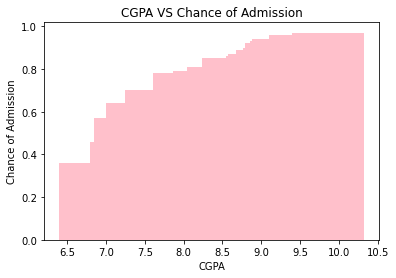

In [384]:
plt.bar(X[:,5], Y[:,0],color = "pink")
plt.title("CGPA VS Chance of Admission")
plt.xlabel("CGPA")
plt.ylabel("Chance of Admission")
plt.show()

In [377]:
print(X)

[[0.44       0.64285714 0.75       ... 4.5        9.65       1.        ]
 [0.44       0.53571429 0.75       ... 4.5        8.87       1.        ]
 [0.52       0.42857143 0.5        ... 3.5        8.         1.        ]
 ...
 [0.8        0.85714286 0.75       ... 4.5        9.45       1.        ]
 [0.44       0.39285714 0.5        ... 4.         8.78       0.        ]
 [0.62       0.89285714 0.75       ... 4.         9.66       1.        ]]


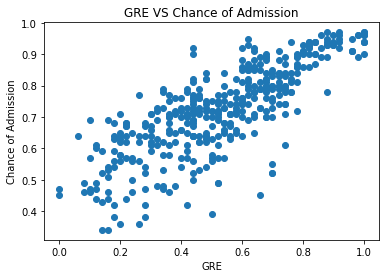

In [378]:
plt.scatter(X[:,0], Y)
plt.title("GRE VS Chance of Admission")
plt.xlabel("GRE")
plt.ylabel("Chance of Admission")
plt.show()

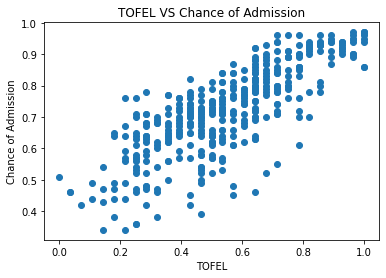

In [379]:
plt.scatter(X[:,1], Y)
plt.title("TOFEL VS Chance of Admission")
plt.xlabel("TOFEL")
plt.ylabel("Chance of Admission")
plt.show()

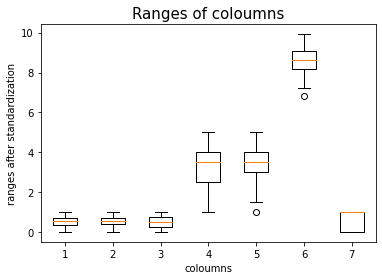

In [380]:
plt.boxplot(X[:,:])
plt.title('Ranges of coloumns',fontsize=15)
plt.xlabel("coloumns")
plt.ylabel("ranges after standardization")
plt.show()

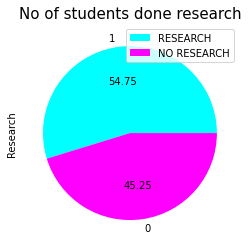

In [381]:
data['Research'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f',cmap='cool')
plt.title('No of students done research',fontsize=15)
plt.legend(['RESEARCH','NO RESEARCH'])
plt.show()

C:\Users\dheer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


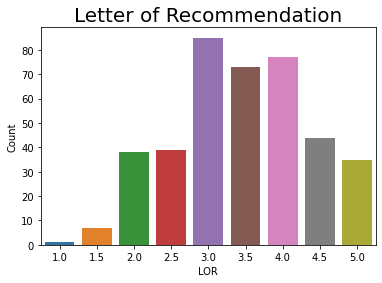

In [382]:
LOR = pd.DataFrame(data.groupby(['LOR']).count()['GRE Score'])
LOR.rename({'GRE Score':'Count'}, axis=1, inplace=True)
sns.barplot(LOR.index, LOR['Count']).set_title('Letter of Recommendation', size='20')
plt.show()

# creating new cleaned file

In [386]:
arr = np.append(X, Y, axis=1)
col = ['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA','Research','Chance of Admit ']
newdf = pd.DataFrame(arr, columns=col)
print(newdf.isnull().sum())
newdf.to_csv('cleaned.csv')

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64
